# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [68]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [99]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | griffith
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | tazovsky
Processing Record 5 of Set 1 | noumea
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | fale old settlement
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | tolanaro
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | surab
Processing Record 16 of Set 1 | udachny
Processing Record 17 of Set 1 | cole harbour
Processing Record 18 of Set 1 | al-`ula
City not found. Skipping...
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | tura
Processing Record 22 of Set 1 | sitka
Pro

In [100]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [101]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,griffith,41.5284,-87.4237,33.36,50,0,4.12,US,1690317881
1,bredasdorp,-34.5322,20.0403,7.35,75,0,0.92,ZA,1690317812
2,bethel,41.3712,-73.4140,27.20,73,95,1.79,US,1690317881
3,tazovsky,67.4667,78.7000,12.31,78,34,4.62,RU,1690317881
4,noumea,-22.2763,166.4572,20.56,99,95,7.27,NC,1690317881


In [102]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [103]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,griffith,41.5284,-87.4237,33.36,50,0,4.12,US,1690317881
1,bredasdorp,-34.5322,20.0403,7.35,75,0,0.92,ZA,1690317812
2,bethel,41.3712,-73.4140,27.20,73,95,1.79,US,1690317881
3,tazovsky,67.4667,78.7000,12.31,78,34,4.62,RU,1690317881
4,noumea,-22.2763,166.4572,20.56,99,95,7.27,NC,1690317881


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [104]:
# pull date from first Date record
timestamp = city_data_df.at[city_data_df.index[1], "Date"]
date_time = datetime.fromtimestamp(timestamp)
date = date_time.strftime("%Y-%m-%d")


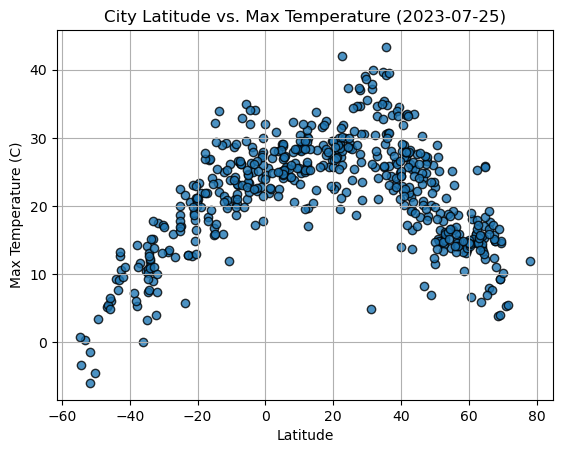

In [105]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({date})")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

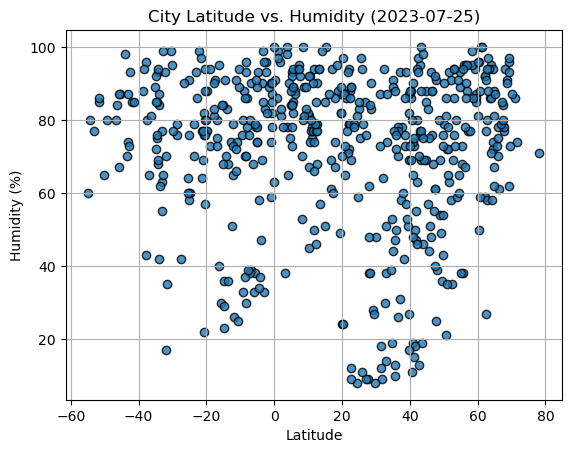

In [106]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title(f"City Latitude vs. Humidity ({date})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

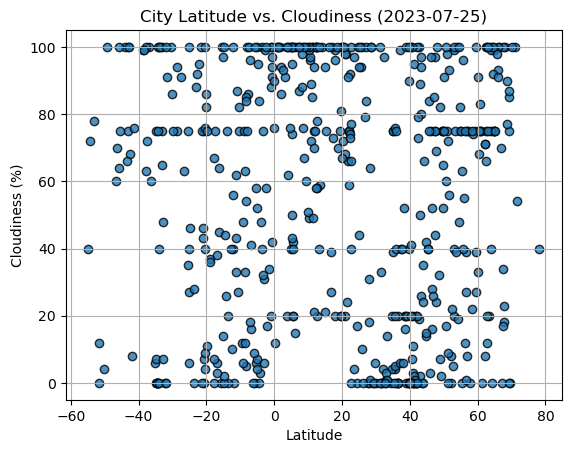

In [107]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({date})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

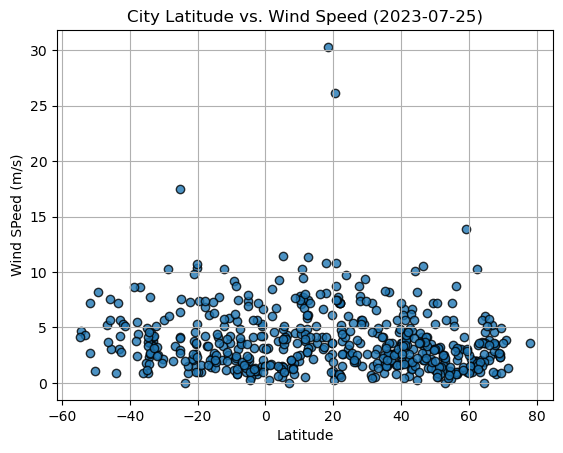

In [108]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind SPeed (m/s)')
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({date})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [109]:
# Define a function to create Linear Regression plots
def plot_linregress(df, x_val, y_val):
    x = df[x_val]
    y = df[y_val]

    # Perform a linear regression
    (slope, y_int, r_value, p_value, std_err) = linregress(x, y)
    line_eq = f"y = {round(slope,2)} x + {round(y_int,2)}"
    reg_values = x * slope + y_int
    
    # plot scatter
    plt.scatter(x, y)
    # plot linear regression line
    plt.plot(x, reg_values, "r-")

    # Label plot and annotate the line equation
    plt.xlabel("Latitude")
    plt.ylabel(y_val)
    plt.annotate(line_eq, ((x.min()+10), (y.min()+5)), fontsize=15, color="red")

    # Print r value
    print(f"The r-value is: {r_value**2}")

    # Show plot
    plt.show()


In [110]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,griffith,41.5284,-87.4237,33.36,50,0,4.12,US,1690317881
2,bethel,41.3712,-73.4140,27.20,73,95,1.79,US,1690317881
3,tazovsky,67.4667,78.7000,12.31,78,34,4.62,RU,1690317881
5,georgetown,5.4112,100.3354,27.23,89,20,1.03,MY,1690317835
9,san patricio,28.0170,-97.5169,37.05,38,18,7.83,US,1690317815


In [111]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,7.35,75,0,0.92,ZA,1690317812
4,noumea,-22.2763,166.4572,20.56,99,95,7.27,NC,1690317881
6,hermanus,-34.4187,19.2345,7.67,68,0,2.38,ZA,1690317760
7,fale old settlement,-9.3852,-171.2468,28.62,76,12,9.20,TK,1690317881
8,adamstown,-25.0660,-130.1015,22.54,91,100,17.51,PN,1690317759


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3845118221725654


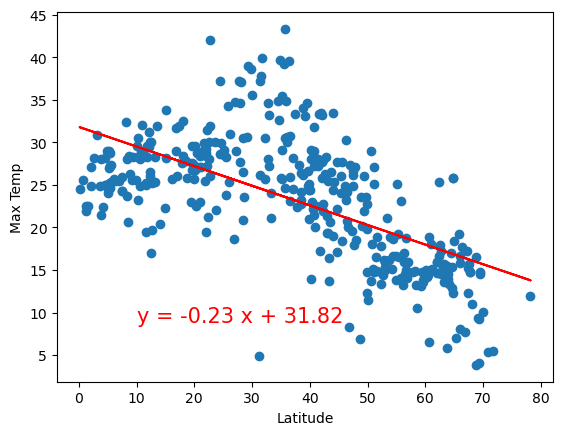

In [112]:
# Linear regression on Northern Hemisphere
plot_linregress(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.7372456782157597


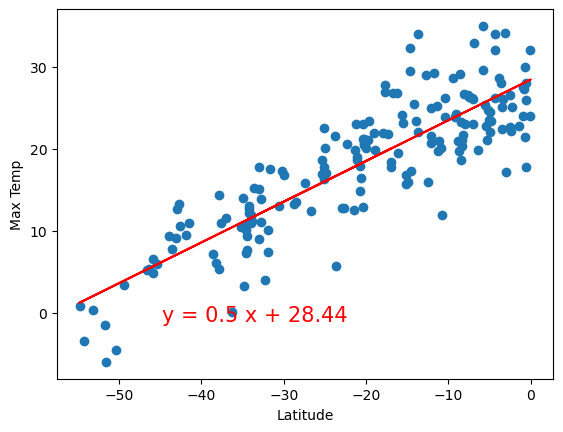

In [113]:
# Linear regression on Southern Hemisphere
plot_linregress(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:**

When reviewing the current linear regression data for cities of the northern and southern hemispheres, ("Latitude" vs "Max Temp"), it appears there is a correlation between a city's latitiudinal distance from the equator (latitude = 0) and it's Max Temp.

While this correlation is more strongly represented in the southern hemisphere, it is still present as a weak/moderate negative correlation (away from the equator) in the northern hemisphere, and the stronger positive correlation (towards the equator in the southern hemisphere).

It is possible the annual seasons may have an effect on the fluctuation of these correlations. While the most recent data depicts a summer month of the northern hemisphere, it also represents a period when the the planet has moved further from the sun, possibly showing a milder range of Max Temps in the northern hemisphere.

To verify the correlations, additional datasets should be examined throughout the year.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0004251912943144876


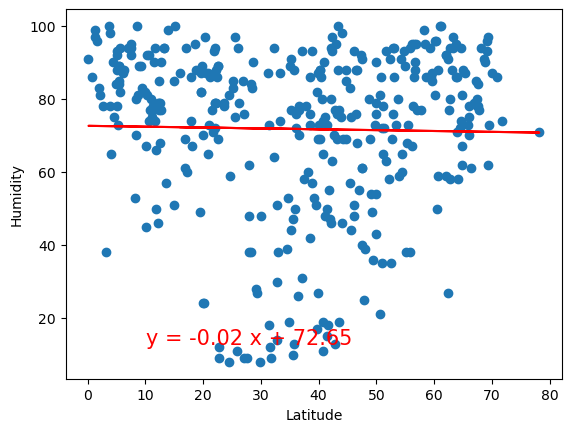

In [114]:
# Northern Hemisphere
plot_linregress(northern_hemi_df, "Lat", "Humidity")

The r-value is: 0.013705967594907562


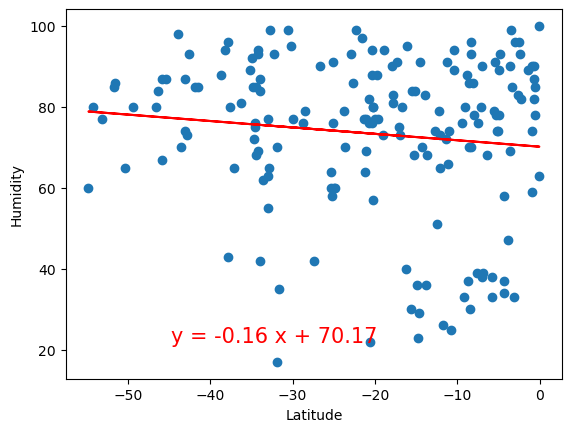

In [115]:
# Southern Hemisphere
plot_linregress(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:**

The linear regression data and r-values of both the northern and southern hemispheres, appear to show no correlation between a city's humidity and its latitude.

Neither the northern nor southern hemisphere show even a weak correlation. While the southern hemisphere may have a slight negative slope to the best fit line, the r-value clearly shows there is not a correlation in this dataset.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.023883098153372678


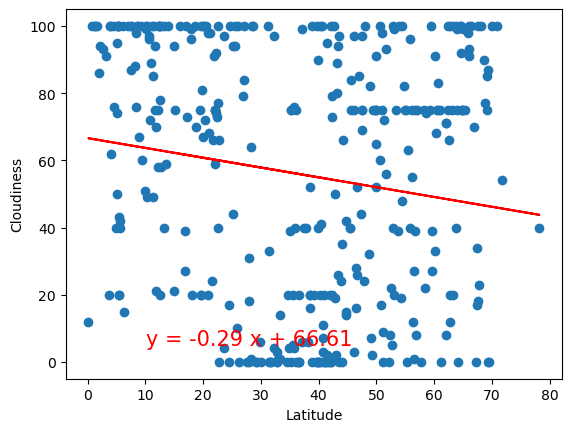

In [116]:
# Northern Hemisphere
plot_linregress(northern_hemi_df, "Lat", "Cloudiness")

The r-value is: 0.0035049769299677724


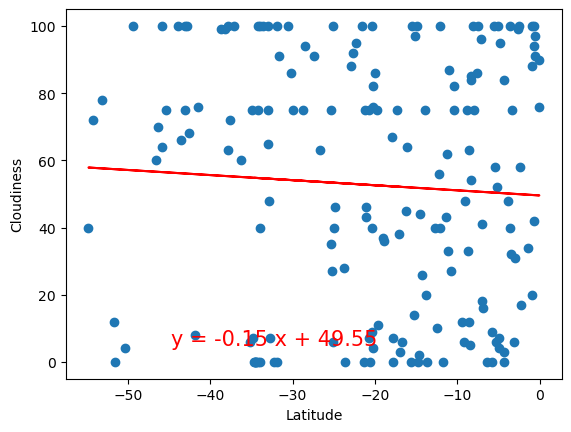

In [117]:
# Southern Hemisphere
plot_linregress(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:**

Much the same as with the previous 'Latitude vs Humidity' data, the data for both the northern and southern hemisphere is widely spread and there appears to be no correlation between a city's latitude and its recorded cloudiness in the current dataset.

Additional datasets should be collected throughout the year to see if there are annual periods which may show more/less cloudiness, and whether those densities show a correlation to latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.046119997659959354


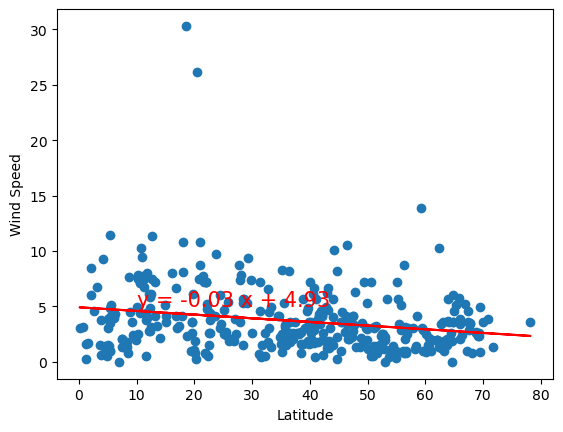

In [118]:
# Northern Hemisphere
plot_linregress(northern_hemi_df, "Lat", "Wind Speed")

The r-value is: 0.022116727346156235


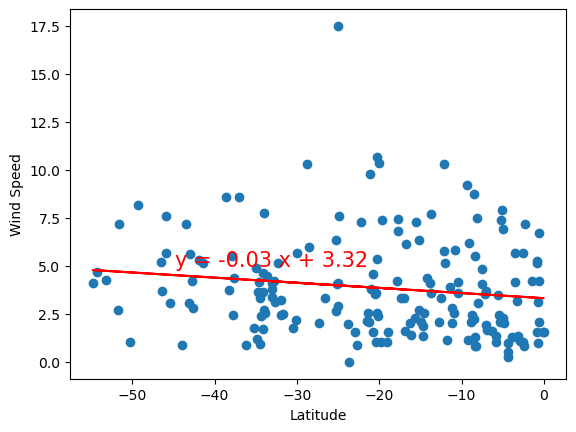

In [119]:
# Southern Hemisphere
plot_linregress(southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:**

Again we see via the spread of the data and the r-values, there appears to be no correlation between a city's latitude and the observed wind speed in the current data set.

It is recommended additional datasets be collected throughout the year to verify if seasonal weather patterns may play a role and furhter illuminate any possible correlations between latitude and wind speed.